# Homework #3

**Ling 571 Computational Corpus Linguistics**  
Due October 22

Name: ?

First, make your own copy of this notebook (File>Save a copy in Drive...).  Then write up your results below (showing all work!) in code and text blocks.  Finally, to turn in your answers, follow these steps:

* Make sure your name is on your notebook!
* Click on "Share"
* Click on "Get shareable link"
* Select "Anyone with the link can comment"
* Paste the link into the submission box for Homework #3 on blackboard

---

#### 0. Read chapters 1 and 2 of the [NLTK Book](https://www.nltk.org/book/) and download the corpora used in the examples.

In [1]:
import nltk
nltk.download('book', quiet=True)

True

In [2]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


---

#### 1. How many words in the Chat Corpus (`text5`) start with the letter *z*?

In [3]:
print(sorted(w for w in (text5) if w.startswith('z'))) #for tokens
print(sorted(w for w in set(text5) if w.startswith('z'))) #for types

['z-ro', 'zombie', 'zone', 'zone', 'zzzzzzzing', 'zzzzzzzz']
['z-ro', 'zombie', 'zone', 'zzzzzzzing', 'zzzzzzzz']


---

#### 2. What is the difference between the following two lines? Which one will give a larger value? Will this be the case in general for all texts?
```
sorted(set(w.lower() for w in text1))
sorted(w.lower() for w in set(text1))
```


In [4]:
"""
The first normalizes the tokens before producing a set so all duplicates of tokens (i.e. 'the'), regardless of case, are included in the final set.
The second creates sets before normalizing such that when they are normalized after two tokens of 'the' are sorted; one for those originally lower case and one 
for those originally upper case. 

"""
print(len(sorted(set(w.lower() for w in text1))))
print(len(sorted(w.lower() for w in set(text1))))

17231
19317


---

#### 3. Write expressions for finding all words in ``text6`` that meet the conditions listed below. The result should be in the form of a list of words: `['word1', 'word2', ...]`.
  * ending in *ness*
  * containing the letter *x*
  * containing the sequence of letters *sk*
  *  is in all capital letters

In [5]:
NESS = sorted(w for w in set(text6) if w.endswith('ness'))
print(NESS)
X = sorted(w for w in set(text6) if 'x' in w)
print(X)
SK = sorted(w for w in set(text6) if 'sk' in w)
print(SK)
CAPS = sorted(w for w in set(text6) if w.isalpha() if w.isupper())
print(CAPS)


['business', 'witness']
['Anthrax', 'Exactly', 'Excalibur', 'Excuse', 'Explain', 'Saxons', 'examine', 'example', 'excepting', 'exciting', 'excuse', 'executive', 'expect', 'expensive', 'explain', 'exploiting', 'next', 'relax', 'sex', 'sixteen']
['Ask', 'ask', 'asking', 'asks', 'husk', 'risk', 'task']
['A', 'ALL', 'AMAZING', 'ANIMATOR', 'ARMY', 'ARTHUR', 'B', 'BEDEVERE', 'BLACK', 'BORS', 'BRIDE', 'BRIDGEKEEPER', 'BROTHER', 'C', 'CAMERAMAN', 'CART', 'CARTOON', 'CHARACTER', 'CHARACTERS', 'CONCORDE', 'CRAPPER', 'CRASH', 'CRONE', 'CROWD', 'CUSTOMER', 'DEAD', 'DENNIS', 'DINGO', 'DIRECTOR', 'ENCHANTER', 'FATHER', 'FRENCH', 'GALAHAD', 'GIRLS', 'GOD', 'GREEN', 'GUARD', 'GUARDS', 'GUEST', 'GUESTS', 'HEAD', 'HEADS', 'HERBERT', 'HISTORIAN', 'I', 'INSPECTOR', 'KING', 'KNIGHT', 'KNIGHTS', 'LAUNCELOT', 'LEFT', 'LOVELY', 'LUCKY', 'MAN', 'MASTER', 'MAYNARD', 'MIDDLE', 'MIDGET', 'MINSTREL', 'MONKS', 'N', 'NARRATOR', 'NI', 'O', 'OF', 'OFFICER', 'OLD', 'OTHER', 'PARTY', 'PATSY', 'PERSON', 'PIGLET', 'PRINCE

---

#### 4. Read in the texts of the State of the Union addresses, using the `state_union` corpus reader. Count occurrences of *men*, *women*, and *people* in each document. What has happened to the usage of these words over time?

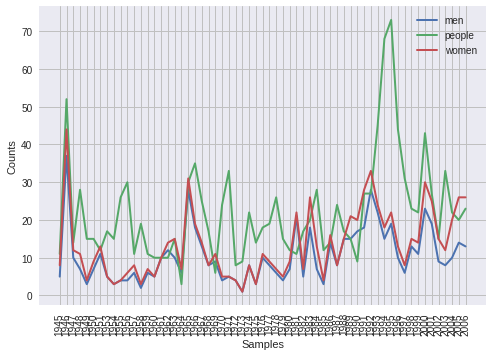

In [6]:
from nltk.corpus import state_union
state_union.fileids()
cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in state_union.fileids()
    for w in state_union.words(fileid)
    for target in ['men', 'women', 'people']
    if w.lower() in target)
cfd.plot()


While the use of men/women has remained fairly parallel over time with use of men being slightly lower, the use of the word people has followed a different pattern spiking in the late 40s, mid 50s, mid-late 60s, early 70s, while maintaining a rise and fall pattern until the nineties where there was a huge spike peaking about 95 and dropping off again. Clearly the Clinton presidency used the term people a lot.

---

#### 5. Write a program to find all words that occur at least 100 times in the Brown Corpus.

In [0]:
import nltk
nltk.download('brown')
brown = nltk.corpus.brown
words = list(brown.words())
fdist = nltk.FreqDist([w.lower() for w in words if w.isalpha()])
fdict = dict(fdist)
hunds = [key for key, value in fdict.items() if value >= 100]
print(hunds[:10])

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
['the', 'county', 'said', 'an', 'of', 'recent', 'no', 'evidence', 'that', 'any']


---

#### 6. Write a program to guess the number of syllables contained in a text, making use of the CMU Pronouncing Dictionary. (This one is **hard**!  If you haven't done much programming before you'll probably find it very challenging, but try your best.)

In [0]:
entries = nltk.corpus.cmudict.entries()
entry_dict = dict(entries)

def syllable_count(text):
    count = 0
    ARPA_VOWELS = ['AA', 'AE', 'AH', 'AO', 'AW', 'AX', 'AXR', 'AY', 'EH', 'ER', 'EY', 'IH', 'IX', 'IY', 'OW', 'OY', 'UH', 'UW', 'UX']
    for word in text:
        pron = entry_dict[word] 
        for phone in pron:
            if phone[:2] in ARPA_VOWELS:
              count += 1
    print(count)
    

In [0]:
test_text = ['Does', 'tHis', '92101', 'flipping', 'work', 'already', '????']
words = sorted(set(w.lower() for w in test_text if w.isalpha()))
print(words)

['already', 'does', 'flipping', 'this', 'work']


In [0]:
syllable_count(words)

8
